## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
# school_data_complete.head()

full_dataset = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID", "Mouse ID"])
full_dataset

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_mice = full_dataset["Mouse ID"].nunique()
num_mice

249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# full_dataset["Mouse ID"].drop_duplicates(keep = False, subset = ['Timepoint'])
# full_dataset.drop_duplicates(subset = ['Timepoint', 'Mouse ID'])
fancy_mouse = full_dataset[full_dataset.duplicated(subset = ['Timepoint', 'Mouse ID'])]
fancy_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# full_dataset = full_dataset.drop_duplicates(subset = ['Timepoint', 'Mouse ID'], keep = False)
full_dataset = full_dataset[full_dataset["Mouse ID"] != "g989"]
full_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice in the clean DataFrame.
num_mice = full_dataset["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stat_df = pd.DataFrame({
    "Mean": full_dataset.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"],
    "Median": full_dataset.groupby("Drug Regimen").median()["Tumor Volume (mm3)"],
    "Variance": full_dataset.groupby("Drug Regimen").var()["Tumor Volume (mm3)"],
    "Standard Deviation": full_dataset.groupby("Drug Regimen").std()["Tumor Volume (mm3)"],
    "SEM": full_dataset.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
})
sum_stat_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_stat_df = full_dataset.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_sum_stat_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

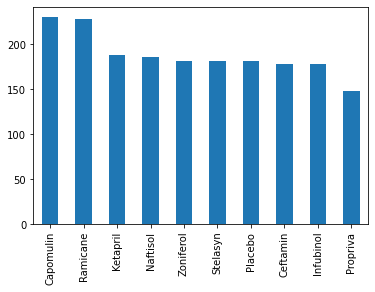

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regiment_count = full_dataset["Drug Regimen"].value_counts()
regiment_count.plot(kind = "bar")

<function matplotlib.pyplot.show(close=None, block=None)>

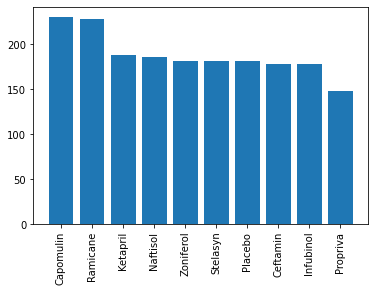

In [80]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
reg_y = regiment_count.values
reg_x = regiment_count.index.values
# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
plt.bar(reg_x, reg_y)
plt.xticks(rotation = 90)
plt.show

<AxesSubplot:ylabel='Sex'>

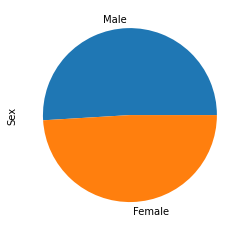

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = full_dataset["Sex"].value_counts()
gender_count.plot(kind = "pie")


<function matplotlib.pyplot.show(close=None, block=None)>

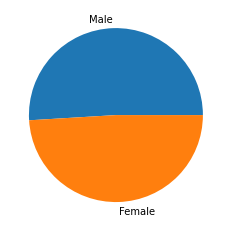

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count.to_list()
plt.pie(gender_count.to_list(), labels = gender_count.index.values)
plt.show


## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = full_dataset.groupby("Mouse ID").max()["Timepoint"]
greatest_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint_tumor = pd.merge(full_dataset, greatest_timepoint, how = "right", on = "Timepoint")
greatest_timepoint_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
39991,y769,Ceftamin,Female,6,27,20,55.025724,2
39992,y865,Ceftamin,Male,23,26,20,52.361982,1
39993,z581,Infubinol,Female,24,25,20,51.807944,2
39994,z795,Naftisol,Female,13,29,20,53.280657,1


In [133]:
full_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [134]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = full_dataset.groupby("Mouse ID").max()["Drug Regimen"].unique().tolist()
treatments_list
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
full_dataset.groupby("Drug Regimen").quantile([.25, .5, .75])["Tumor Volume (mm3)"]

    # ONLY ONLY ONLY ONLY ONLY Capomulin, Ramicane, Infubinol, and Ceftamin
    # Locate the rows which contain mice on each drug and get the tumor volumes
# quartiles = full_dataset["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Drug Regimen      
Capomulin     0.25    37.685933
              0.50    41.557809
              0.75    45.000000
Ceftamin      0.25    47.208427
              0.50    51.776157
              0.75    56.801438
Infubinol     0.25    47.312353
              0.50    51.820584
              0.75    57.314444
Ketapril      0.25    48.232987
              0.50    53.698743
              0.75    60.870951
Naftisol      0.25    47.285874
              0.50    52.509285
              0.75    59.963034
Placebo       0.25    47.459053
              0.50    52.288934
              0.75    59.916934
Propriva      0.25    46.894328
              0.50    50.446266
              0.75    56.491585
Ramicane      0.25    36.674635
              0.50    40.673236
              0.75    45.000000
Stelasyn      0.25    48.047139
              0.50    52.431737
              0.75    58.719297
Zoniferol     0.25    47.337876
              0.50    51.818479
              0.75    57.954259
Name: Tumor Volume (m

In [182]:
# greatest_timepoint_tumor.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile([.25, .5, .75])
# ONLY ONLY ONLY ONLY ONLY Capomulin, Ramicane, Infubinol, and Ceftamin
cap_ds = greatest_timepoint_tumor[greatest_timepoint_tumor["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
cap_ds
ram_ds = greatest_timepoint_tumor[greatest_timepoint_tumor["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
inf_ds = greatest_timepoint_tumor[greatest_timepoint_tumor["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
cef_ds = greatest_timepoint_tumor[greatest_timepoint_tumor["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
cap_quart = cap_ds.quantile([.25, .5, .75])

# quartiles = full_dataset["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = cap_quart[0.25]
upperq = cap_quart[0.75]
iqr = upperq-lowerq
print("CAPOMULIN")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"lower: {lower_bound}\nupper: {upper_bound}")

ram_quart = ram_ds.quantile([.25, .5, .75])
lowerq = ram_quart[0.25]
upperq = ram_quart[0.75]
iqr = upperq-lowerq
print("RAMICANE")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"lower: {lower_bound}\nupper: {upper_bound}")
# cap_ds.quantile([.25, .5, .75])
# cap_quart

inf_quart = inf_ds.quantile([.25, .5, .75])
lowerq = inf_quart[0.25]
upperq = inf_quart[0.75]
iqr = upperq-lowerq
print("INFUBINOL")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"lower: {lower_bound}\nupper: {upper_bound}")

cef_quart = cef_ds.quantile([.25, .5, .75])
lowerq = cef_quart[0.25]
upperq = cef_quart[0.75]
iqr = upperq-lowerq
print("CEFTAMIN")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"lower: {lower_bound}\nupper: {upper_bound}")

CAPOMULIN
The lower quartile of temperatures is: 35.46375763
The upper quartile of temperatures is: 43.23038986
The interquartile range of temperatures is: 7.766632229999999
The the median of temperatures is: 48.933453655 
lower: 23.813809285000005
upper: 54.880338205
RAMICANE
The lower quartile of temperatures is: 33.56240217
The upper quartile of temperatures is: 43.04754260000001
The interquartile range of temperatures is: 9.485140430000008
The the median of temperatures is: 48.933453655 
lower: 19.334691524999986
upper: 57.275253245000016
INFUBINOL
The lower quartile of temperatures is: 49.27309187
The upper quartile of temperatures is: 64.13872489
The interquartile range of temperatures is: 14.865633020000004
The the median of temperatures is: 48.933453655 
lower: 26.974642339999995
upper: 86.43717442000002
CEFTAMIN
The lower quartile of temperatures is: 49.40687901
The upper quartile of temperatures is: 63.46954946
The interquartile range of temperatures is: 14.062670450000006
Th

In [162]:
all_datas = [cap_ds, ram_ds, inf_ds, cef_ds]

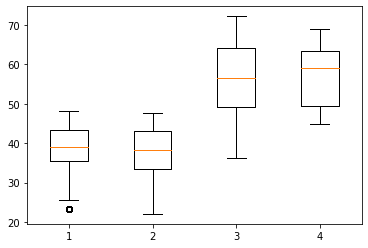

In [163]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
plt.boxplot(all_datas)
plt.show()


## Line and Scatter Plots

In [237]:
# cap_avg_volume = full_dataset.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]["Capomulin"]
# full_dataset.groupby("Drug Regimen").max()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,y793,Male,24,25,45,48.158209,3
Ceftamin,y865,Male,24,30,45,68.923185,4
Infubinol,z581,Male,24,30,45,72.226731,4
Ketapril,y260,Male,24,30,45,78.567014,4
Naftisol,z969,Male,23,30,45,76.668817,4
Placebo,y478,Male,21,30,45,73.212939,4
Propriva,z435,Male,24,30,45,72.455421,4
Ramicane,z578,Male,23,25,45,47.622816,3
Stelasyn,z314,Male,23,30,45,75.123690,4


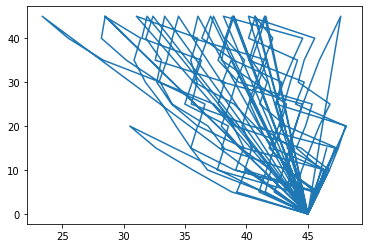

In [239]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# regiment_count = full_dataset["Drug Regimen"].value_counts()
# regiment_count.plot(kind = "bar")

# reg_y = regiment_count.values
# reg_x = regiment_count.index.values

line_y = full_dataset[full_dataset["Drug Regimen"] == "Capomulin"]["Timepoint"].values
line_x = full_dataset[full_dataset["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].values
line_y
plt.plot(line_x, line_y)
# plt.plot(full_dataset[full_dataset["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"], full_dataset[full_dataset["Drug Regimen"] == "Capomulin"]["Timepoint"])

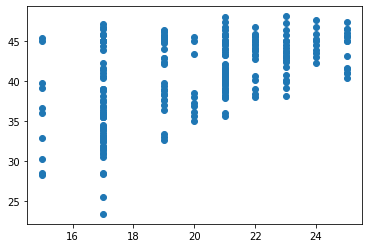

In [242]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# plt.scatter
scatter_y = full_dataset[full_dataset["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].values
scatter_x = full_dataset[full_dataset["Drug Regimen"] == "Capomulin"]["Weight (g)"].values
plt.scatter(scatter_x, scatter_y)


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# correlation coefficient is slope regression is line through graph

0.9609669432428346

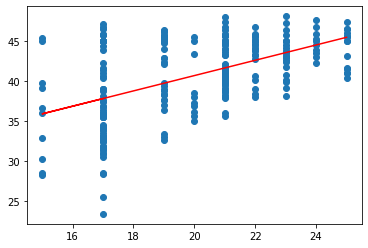

In [250]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_x, scatter_y)
# regress_values = scatter_x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scatter_x, scatter_y)
plt.plot(scatter_x,regress_values,"r-")
slope